# HEATMAP

potresti provare per favore a fare:
- la somma totale dei conteggi per A e B
- la somma totale dei conteggi escludendo i pixel con count>36 (tenendo traccia di quanti pixel sono così mascherati)
- la somma totale di conteggi escludendo i pixel con count >360

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm, Normalize

import seaborn as sns; sns.set_theme()


%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_A_PREAMP_70_CD_100_LDAC_14_soglia_590.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_A_PREAMP_70_CD_100_LDAC_14_soglia_680.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_A_PREAMP_70_CD_100_LDAC_14_soglia_950.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_A_PREAMP_70_CD_100_LDAC_14_soglia_1000.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_A_PREAMP_70_CD_100_LDAC_14_soglia_1200.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_A_PREAMP_70_CD_100_LDAC_14_soglia_1500.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_B_PREAMP_70_CD_100_LDAC_14_soglia_590.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test preamp 70 CD 100/noise_B_PREAMP_70_CD_100_LDAC_14_soglia_680.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/test pr

In [3]:
paths = button.files

In [4]:
def getHits(file):
    channels = []
    counts = []
    with open (file, 'rt') as myfile:
        lines = myfile.readlines()
        for i in range(0, len(lines)):    
            line = lines[i].split()
            if(line[0].isdigit()):
                channels.append(int(line[0]))
                counts.append(int(line[1]))
    #a = pd.DataFrame(list(zip(channels, counts)), columns = ['Channel', "Counts"]) 
    return counts

In [5]:
def calcolaCose(vettore, start,end, maxx):
    Sum = 0
    count = 0
    minor = []
    for x in vettore[start:end]:
        if(x<maxx):
            minor.append(x)
            Sum += x
        else:
            count+=1
    return count, Sum, minor


In [6]:
def printStats(fileA, fileB):
    counts_A = getHits(fileA)
    counts_B = getHits(fileB)

    countA36, sumA36, minorA36 = calcolaCose(counts_A,16,128, 36)
    countA360, sumA360, minorA360 = calcolaCose(counts_A, 16,128, 360)
    countB36, sumB36, minorB36 = calcolaCose(counts_B,128,240, 36)
    countB360, sumB360, minorB360 = calcolaCose(counts_B,128,240, 360)

    
    model = os.path.basename(fileA[-7:-4])
    
    print("SOGLIA: "+model +"\n")
    print("A:")
    print("Tot hits --> "+str(sum(counts_A[16:128])))
    print("Mean --> "+str(round(np.mean(counts_A[16:128]), 2)))    
    print("Hits < 36 --> " +str(sumA36) + ", mean: " + str(round(np.mean(minorA36), 2)) + ", excluding "+ str(countA36)+ " pixels")
    print("Hits < 360 --> " +str(sumA360) + ", mean: " + str(round(np.mean(minorA360), 2)) + ", excluding "+ str(countA360)+ " pixels")

   
    
    print("B:")
    print("Tot hits --> "+ str(sum(counts_B[128:240])))
    print("Mean -->"+str(round(np.mean(counts_B[128:240]),2)))
    print("Hits < 36 --> " +str(sumB36) + ", mean: " + str(round(np.mean(minorB36), 2)) + ", excluding "+ str(countB36)+ " pixels")
    print("Hits < 360 --> " +str(sumB360) + ", mean: " + str(round(np.mean(minorB360), 2)) + ", excluding "+ str(countB360)+ " pixels")

    print("\n-------------------------------------------\n")    


In [7]:
def plotHeatmap(fileA, fileB):
    
    counts_A = getHits(fileA)
    counts_B = getHits(fileB)

   
   
    
    noise_A = [counts_A[x:x+7] for x in range(16, 128, 7)]
    noise_B = [counts_B[x:x+7] for x in range(128, 240, 7)]
    
    
    model = os.path.basename(fileA[-8:-4])

    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey='row', figsize = (11, 11))
    fig.subplots_adjust(wspace=0.01)
    
    sns.heatmap(noise_A, ax = ax1, annot = True, fmt="d" , vmin=0,vmax = 36, xticklabels=False, yticklabels=False, square=True, cbar = False, cmap = "jet") #cmap="BuPu"
    fig.colorbar(ax1.collections[0],  ax=ax1, location = "left", use_gridspec=False, pad=0)

    sns.heatmap(noise_B, ax = ax2,annot = True, fmt="d", vmin=0, vmax = 36, xticklabels=False, yticklabels=False, square=True, cbar = False, cmap = "jet") #cmap="BuPu"
    fig.colorbar(ax2.collections[0], ax=ax2, location = "right", use_gridspec=False, pad=0)

    ax1.set_xlabel("RD53A")
    ax2.set_xlabel("RD53B")

    fig.suptitle('Noise Occupancy with threshold = '+ model + " electrons",fontsize=20, y = 0.92)
    
    plt.savefig('Heatmap noise soglia '+model+' I_PREAMP=70uA', bbox_inches='tight')

    plt.show()


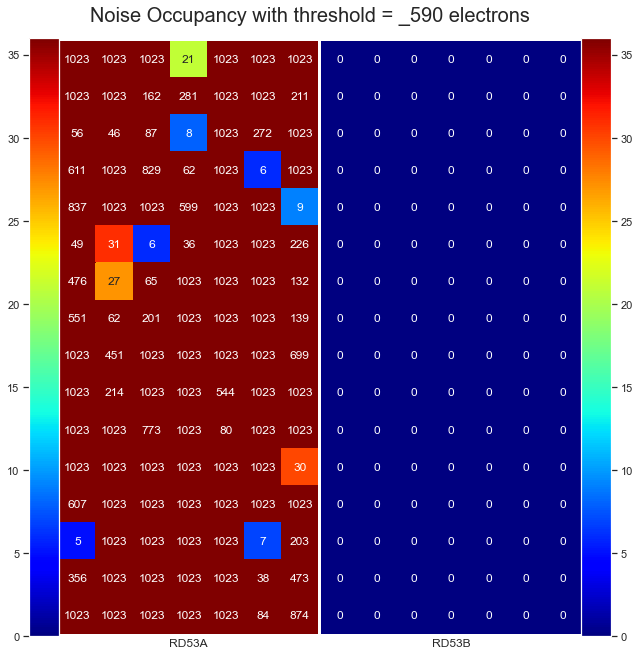

SOGLIA: 590

A:
Tot hits --> 80077
Mean --> 714.97
Hits < 36 --> 150, mean: 15.0, excluding 102 pixels
Hits < 360 --> 3212, mean: 100.38, excluding 80 pixels
B:
Tot hits --> 97583
Mean -->871.28
Hits < 36 --> 33, mean: 33.0, excluding 111 pixels
Hits < 360 --> 2228, mean: 202.55, excluding 101 pixels

-------------------------------------------



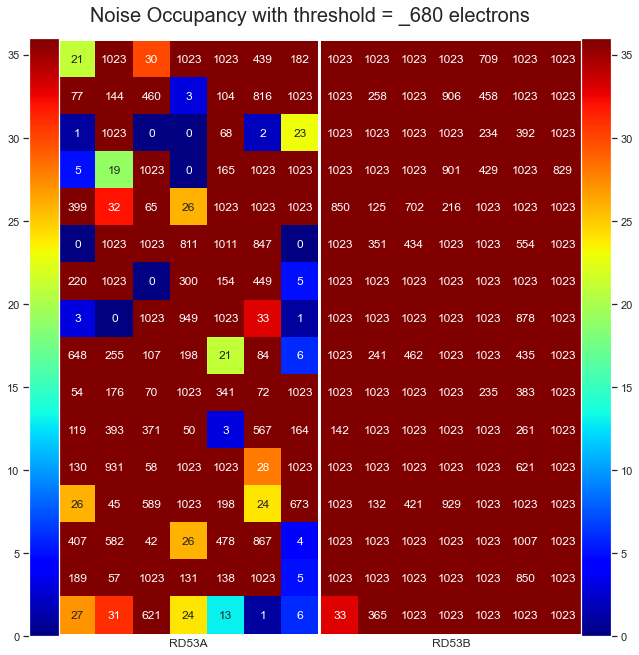

SOGLIA: 680

A:
Tot hits --> 42466
Mean --> 379.16
Hits < 36 --> 449, mean: 12.47, excluding 76 pixels
Hits < 360 --> 4606, mean: 68.75, excluding 45 pixels
B:
Tot hits --> 91573
Mean -->817.62
Hits < 36 --> 4, mean: 4.0, excluding 111 pixels
Hits < 360 --> 3343, mean: 208.94, excluding 96 pixels

-------------------------------------------



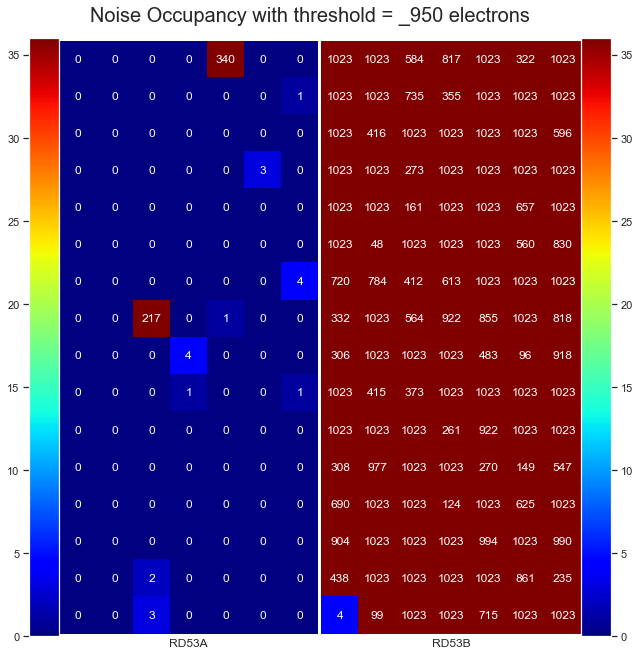

SOGLIA: 950

A:
Tot hits --> 577
Mean --> 5.15
Hits < 36 --> 20, mean: 0.18, excluding 2 pixels
Hits < 360 --> 577, mean: 5.15, excluding 0 pixels
B:
Tot hits --> 18116
Mean -->161.75
Hits < 36 --> 634, mean: 14.74, excluding 69 pixels
Hits < 360 --> 8191, mean: 82.74, excluding 13 pixels

-------------------------------------------



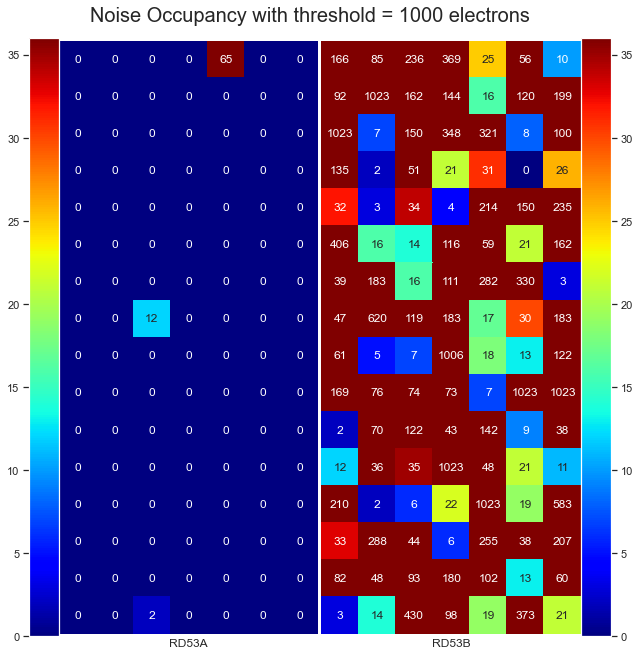

In [ ]:
for i in range(0,6):
    plotHeatmap(paths[i], paths[i+5])
    printStats(paths[i], paths[i+6])